0. Context 

O código aplica o algoritmo K-Means ao conjunto de dados Iris para agrupar flores com base em suas características físicas: comprimento e largura de pétalas e sépalas. O K-Means divide os dados em k clusters, onde cada flor é atribuída ao cluster mais próximo com base nas medidas fornecidas. Esse processo ajuda a identificar padrões naturais nos dados e a diferenciar entre as espécies de flores com base em suas características morfológicas.

1. Packages and libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

2. Loads

In [2]:
# Carrega o dataset e retira a coluna 'species' do conjunto de dados
data = sns.load_dataset('iris')
data = data.drop(['species'], axis=1)
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


3. Exploratory data analysis

3.1 Dictionary

In [3]:
dict_columns = {
    'sepal_length':'comprimento da sépala',
    'sepal_width': 'largura da sépala',
    'petal_length': 'comprimento da pétala',
    'petal_width': 'largura da pétala'
}

3.2 Knowing the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


3.3 Generating views

3.3.1 Atributos preditivos

c:\Users\Matheus Rodrigues\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Matheus Rodrigues\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Matheus Rodrigues\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Matheus Rodrigues\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Matheus Rodrigues\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarni

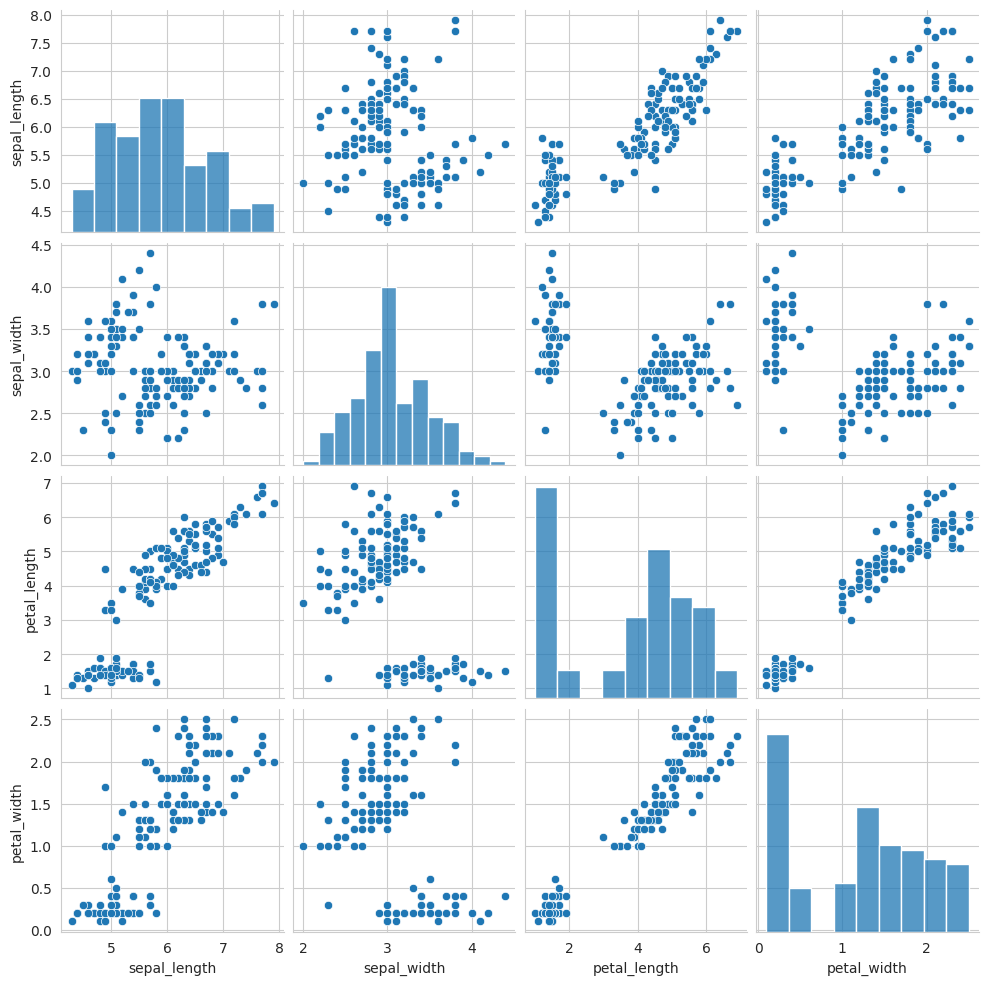

In [6]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data, palette="pastel")

Considerações: Observa-se que na maioria dos gráficos há a formação de agrupamentos distintos de pontos relacionados ao comprimento e largura tanto da sépala quanto da pétala. Nota-se também a presença de um grupo maior de pontos que apresenta valores intermediários a elevados. Este agrupamento mais extenso sugere a possibilidade de que ele possa ser subdividido em grupos adicionais, revelando padrões mais detalhados. 

4. Data

4.1 Null values

In [7]:
# Verifica se há algum valor Nan ou Null no dataframe e retorna um booleano
data.isnull().values.any()

False

5. Standardization of numerical variables

In [8]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
# Calcula a média dos atributos numéricos
sepal_length_mean = data['sepal_length'].mean()
print(sepal_length_mean)
sepal_width_mean = data['sepal_width'].mean()
print(sepal_width_mean)
petal_length_mean = data['petal_length'].mean()
print(petal_length_mean)
petal_width_mean = data['petal_width'].mean()
print(petal_width_mean)

5.843333333333334
3.0573333333333337
3.7580000000000005
1.1993333333333336


In [10]:
# Calcula o desvio padrão dos atributos numéricos
sepal_length_std = data['sepal_length'].std()
print(sepal_length_std)
sepal_width_std = data['sepal_width'].std()
print(sepal_width_std)
petal_length_std = data['petal_length'].std()
print(petal_length_std)
petal_width_std = data['petal_width'].std()
print(petal_width_std)

0.828066127977863
0.4358662849366982
1.7652982332594662
0.7622376689603465


In [11]:
# Aplicando a função de padronização
data['sepal_length_std'] = data['sepal_length'].apply(
    lambda x: (x - sepal_length_mean) / sepal_length_std
    )
data['sepal_width_std'] = data['sepal_width'].apply(
    lambda x: (x - sepal_width_mean) / sepal_width_std
    )
data['petal_length_std'] = data['petal_length'].apply(
    lambda x: (x - petal_length_mean) / petal_length_std
    )
data['petal_width_std'] = data['petal_width'].apply(
    lambda x: (x - petal_width_mean) / petal_width_std
    )

In [12]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,sepal_length_std,sepal_width_std,petal_length_std,petal_width_std
0,5.1,3.5,1.4,0.2,-0.897674,1.015602,-1.335752,-1.311052
1,4.9,3.0,1.4,0.2,-1.139200,-0.131539,-1.335752,-1.311052
2,4.7,3.2,1.3,0.2,-1.380727,0.327318,-1.392399,-1.311052
3,4.6,3.1,1.5,0.2,-1.501490,0.097889,-1.279104,-1.311052
4,5.0,3.6,1.4,0.2,-1.018437,1.245030,-1.335752,-1.311052


6. Data cleaning

In [13]:
# Retirando as colunas redundantes do dataframe
data = data.drop(['sepal_length','sepal_width','petal_length','petal_width'], axis=1)

In [14]:
data.head()

,sepal_length_std,sepal_width_std,petal_length_std,petal_width_std
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052


7. Modeling

7.1 Training

In [15]:
wcss = []

# Treinar 10 modelos de K-médias variando o número de clusters de 1 a 10
for n_clusters in range(1, 11):
    # Inicializar o modelo KMeans
    model = KMeans(n_clusters=n_clusters)
    
    # Treinar o modelo
    model.fit(data)
    
    # Adicionar o WCSS à lista
    wcss.append(model.inertia_)

print(wcss)

[596.0000000000001, 220.87929359858947, 139.09920108912456, 113.33162351277814, 91.03429687049733, 82.7187012887352, 87.6923102717328, 65.32154371569112, 60.36388566303056, 51.63059370673847]


In [16]:
model.__dict__

{'n_clusters': 10,
 'init': 'k-means++',
 'max_iter': 300,
 'tol': 0.0001,
 'n_init': 'auto',
 'verbose': 0,
 'random_state': None,
 'copy_x': True,
 'algorithm': 'lloyd',
 'feature_names_in_': array(['sepal_length_std', 'sepal_width_std', 'petal_length_std',
        'petal_width_std'], dtype=object),
 'n_features_in_': 4,
 '_tol': 9.933333333333333e-05,
 '_n_init': 1,
 '_algorithm': 'lloyd',
 '_n_threads': 12,
 'cluster_centers_': array([[ 0.0626819 , -0.21894002,  0.38256048,  0.32573267],
        [-0.93018708,  1.05972279, -1.27910398, -1.22022645],
        [ 0.35968521, -0.83331907,  0.82019136,  0.85748562],
        [ 2.00064537, -0.42651788,  1.48044592,  1.14412509],
        [ 0.98623363, -0.02829614,  0.71206099,  0.66339763],
        [-1.38072709,  0.05487157, -1.33221116, -1.32745123],
        [-0.20861268, -1.33266271,  0.19706718,  0.05489513],
        [ 1.21568391,  0.67145975,  1.15674505,  1.41588134],
        [-1.13920048, -1.73753594, -0.49736638, -0.41894195],
       

8. Assessment

8.1 Generating Elbow Method visualization

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_28500\2597540661.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(x=range(1, 11), y=wcss, marker="8", palette="pastel")


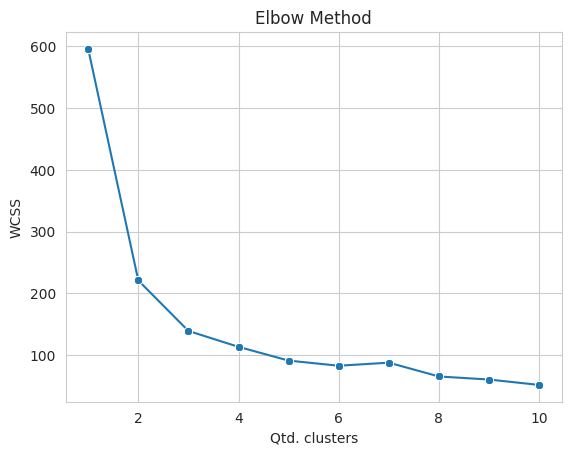

In [17]:
# Gerando gráfico lineplot para o método 'Elbow Method'
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(x=range(1, 11), y=wcss, marker="8", palette="pastel")
  grafico.set(title='Elbow Method', ylabel='WCSS', xlabel='Qtd. clusters');

In [18]:
# Define o número de clusters do modelo
model = KMeans(n_clusters=4)
model = model.fit(data)

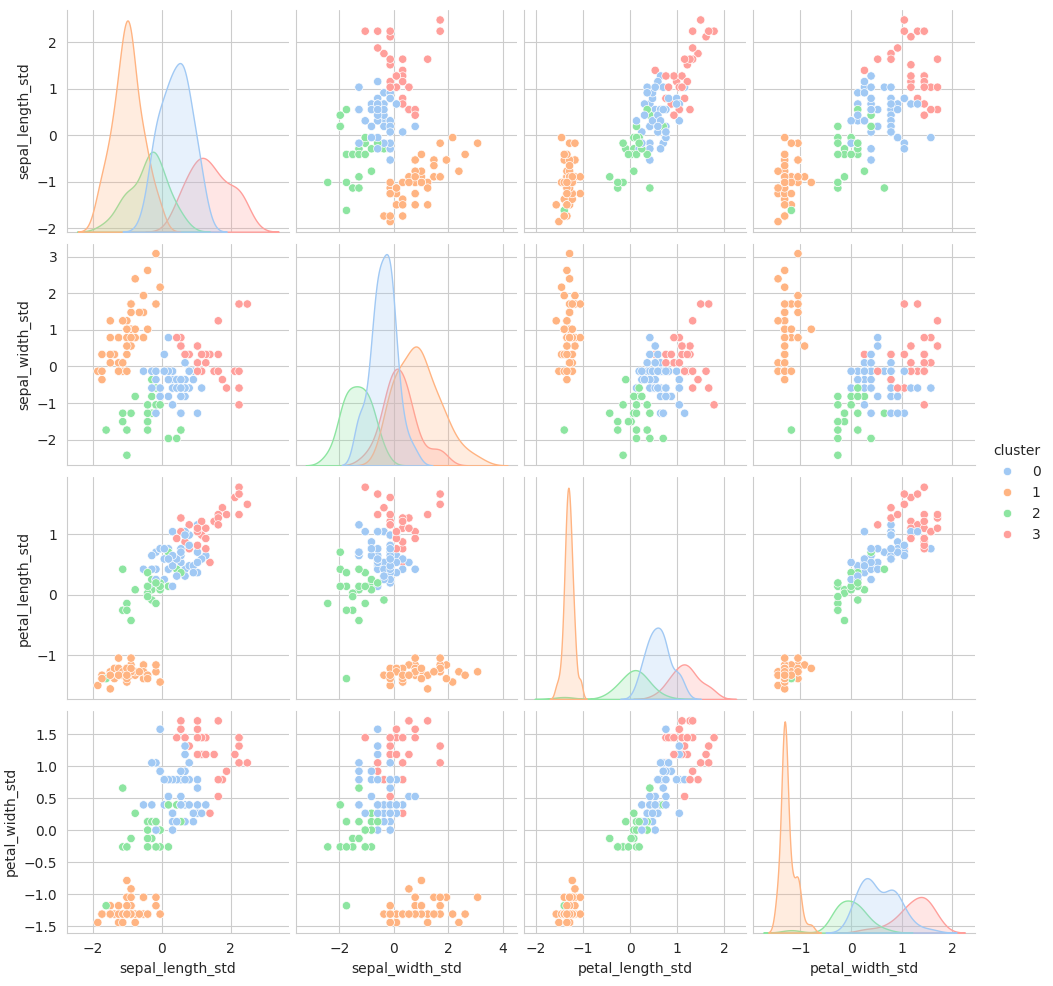

In [19]:
# Gerando visualização com os atributos numéricos para o modelo definido
clusters = model.labels_
clustered_data = pd.concat([data, pd.DataFrame(clusters, columns=['cluster'])], axis=1)

with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=clustered_data, hue='cluster', palette="pastel")

8.2 Study of clusters

Cluster 1: Representa as flores maiores com largura e comprimeto elevados das pétalas e sépalas.

Cluster 2: Representa a as flores com valores médios nas largutas e cumprimentos.

Cluster 3: Representa as flores pequenas, mas com larguras de sépalas acima da média.

Cluster 0: Representa as flores pequenas, mas com largutas de sépalas abaixo da média.

Saindo do ponto que eu não sei a quantidade de espécies, na minha percepção, a escolha de 4 clusters proporciona uma boa divisão dos grupos, com uma separação clara entre eles. Com 5 clusters, no entanto, há uma sobreposição significativa e uma redundância maior nos dados, pois o quinto cluster tende a dividir ainda mais os grupos já definidos. A divisão em 4 clusters é eficaz ao distinguir as flores menores de forma mais clara e útil, evitando a criação de clusters redundantes que não adicionam valor adicional à análise.

10. Prediction

In [20]:
data.head()

,sepal_length_std,sepal_width_std,petal_length_std,petal_width_std
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052


In [21]:
# Padroniza os atributos da flor exemplo
sepal_length_ex = (38.2 - sepal_length_mean) / sepal_length_std
sepal_width_ex = (18.1 - sepal_width_mean) / sepal_width_std
petal_length_ex = (185.0 - petal_length_mean) / petal_length_std
petal_width_ex = (185.0 - petal_width_mean) / petal_width_std

In [22]:
# Aloca os atributos padronizados da flor exemplo em um array
flor_ex = np.array([sepal_length_ex, sepal_width_ex, petal_length_ex, petal_width_ex])
print(flor_ex)

[ 39.07497913  34.51211343 102.66933744 241.13301422]


In [24]:
# Prever em qual cluster a flor exemplo vai estar agrupada
cluster = model.predict(flor_ex.reshape(1, -1))
print(cluster)

[3]


c:\Users\Matheus Rodrigues\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
